In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import special


font = {'size'   : 14}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


# Pure birth process
Consider a population of $n$ individuals increases by one individual with a rate $\mu$:

$$
n \xrightarrow{\mu} n+1 \, ,
$$

After a time $t$, the probability that population is made of $n$ individuals follows the Poisson distribution

$$
P_n(t) = \frac{1}{n!} (\mu t)^n e^{-\mu t}
$$

In [2]:
# Grid
nmin    = 0
nmax    = 100
nvalues = 1 + nmax - nmin
n       = np.linspace(nmin, nmax, nvalues, dtype = int)

In [3]:
# Poisson distribution
def p(n,mu,t):
    return np.exp(- mu * t) * (mu * t)**n / special.factorial(n)

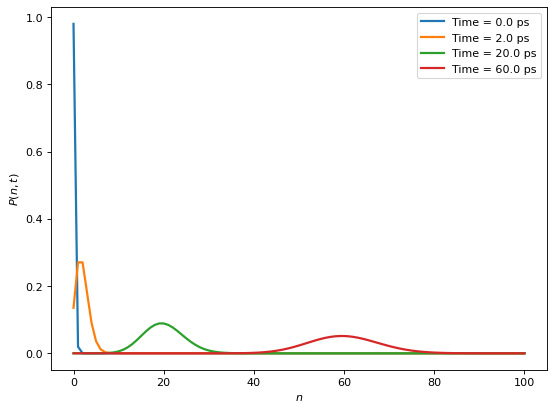

In [4]:
# rate
mu = 1

# timestep
dt = 0.02

plt.figure(figsize=(8, 6), dpi=80)

t1 = 1  * dt
t2 = 100  * dt
t3 = 1000  * dt
t4 = 3000  * dt

plt.plot(n, p(n, mu, t1) , linewidth = 2, label = 'Time = %1.1f ps' %t1 )
plt.plot(n, p(n, mu, t2) , linewidth = 2, label = 'Time = %1.1f ps' %t2 )
plt.plot(n, p(n, mu, t3) , linewidth = 2, label = 'Time = %1.1f ps' %t3 )
plt.plot(n, p(n, mu, t4) , linewidth = 2, label = 'Time = %1.1f ps' %t4 )
plt.xlabel(r'$n$')
plt.ylabel(r'$P(n,t)$')
plt.legend()

# Time-driven simulation
Simulation runs in steps

### Algorithm
1. We discretize the time in timesteps of length $\Delta t$
2. At each timestep we draw a random number $u$ from a uniform distribution $\mathcal{U}(0,1)$
3. An event (e.g.: $N\rightarrow N+1$) occurs if $u<\mu \Delta t$. 

We are assuming that an event occurs at a uniform rate $\mu$ over time.
If the probability of the event in the time interval $\Delta t$ is one ($P(n;m,\Delta t) = 1$), then $\mu = \Delta t^{-1}$.

Text(0, 0.5, 'N(t)')

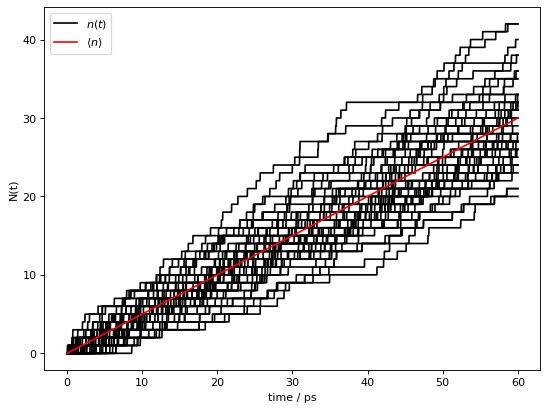

In [5]:
mu = 0.5
dt = 0.02

Nreps  = 5000
Nsteps = 3000

N  = np.zeros((Nsteps, Nreps))


for t in range(Nsteps-1):
    u = np.random.uniform(0, 1, (Nreps))
    
    N[t+1,:] = N[t,:]
    N[t+1, u<mu*dt] = N[t+1,u<mu*dt] + 1
        
##Figure
# Array of t values
tvalues = np.linspace(0, Nsteps, Nsteps)
tvalues = tvalues * dt

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(tvalues, N[:,0],'k', label=r'$n(t)$');
plt.plot(tvalues, N[:,0:-1:100],'k');
plt.plot(tvalues, mu * tvalues, 'r', label=r'$\langle n \rangle$');
plt.legend()
plt.xlabel('time / ps')
plt.ylabel('N(t)')

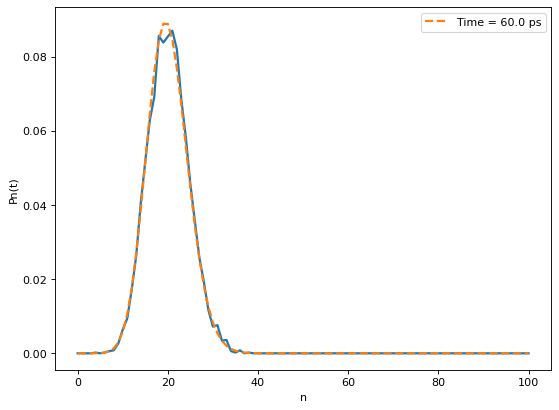

In [6]:
# Calculate histogram and compare with exact solution
ni = 2000

h  = np.histogram(N[ni,:], bins=nvalues, range=(nmin-0.5, nmax+0.5), density=True)
h0 = h[0]


ti = ni  * dt

plt.figure(figsize=(8, 6), dpi=80)

plt.plot(n, h0, linewidth = 2)
plt.plot(n, p(n, mu, ti), '--' , linewidth = 2, label = 'Time = %1.1f ps' %t4 );
plt.xlabel('n')
plt.ylabel('Pn(t)')
plt.legend()

# Event-driven simulation
Simulation runs from event to event

### Gillespie algorithm
0. Assume the system is at time $t$
1. Draw a random number $\tau$ from the distribution $P(\tau) = \mu \exp(-\mu \tau)\tau$
2. An event (e.g.: $N\rightarrow N+1$) occurs at time $t+\tau$. 

To draw a random number $\tau$ from the distribution $P(\tau) = \mu \exp(-\mu \tau)$, we can exploit the probability integral transform theorem:

$$
\tau = - \frac{\log(u)}{\mu} \, ,
$$
with $u\in \mathcal{U}(0,1)$.

Text(0, 0.5, 'N(t)')

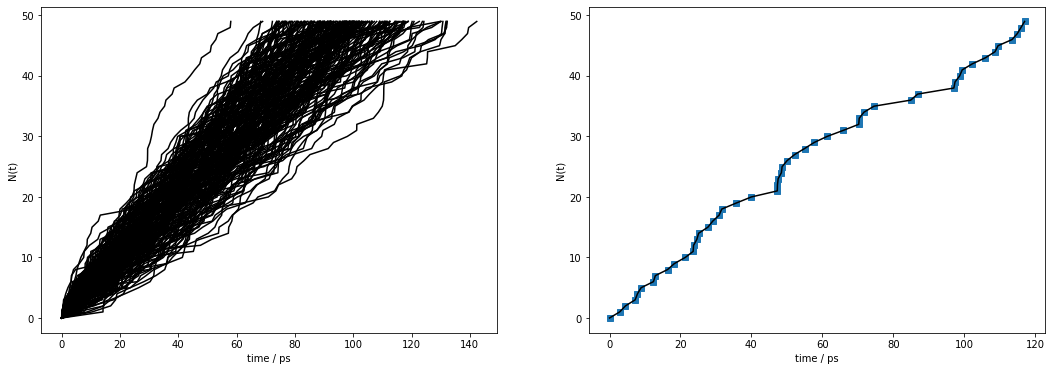

In [7]:
# We do not need dt, just the rate
mu = 0.5

Nreps  = 20000
Nsteps = 50    # non-physical steps

Ng        = np.zeros((Nsteps, Nreps))
real_time = np.zeros((Nsteps, Nreps))

for t in range(Nsteps-1):
    u = np.random.uniform(0, 1, (Nreps))
    tau = - np.log(u) / mu
    real_time[t+1,:] = real_time[t,:] + tau
    Ng[t+1,:] = Ng[t,:] + 1
        
##Figure
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18, 6))

ax0.plot(real_time[:,0:-1:100], Ng[:,0:-1:100],'k');
ax0.set_xlabel('time / ps')
ax0.set_ylabel('N(t)')

ax1.plot(real_time[:,0], Ng[:,0],'s');
ax1.plot(real_time[:,0], Ng[:,0],'k');
ax1.set_xlabel('time / ps')
ax1.set_ylabel('N(t)')

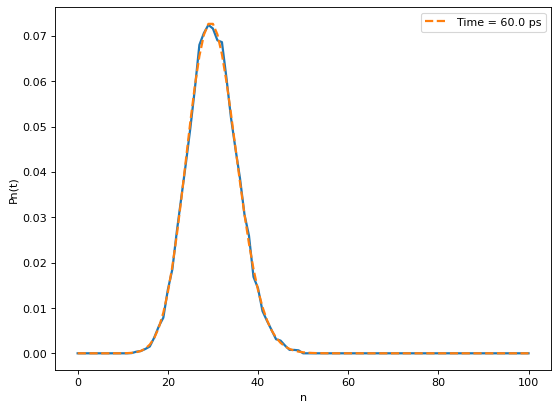

In [8]:
# Calculate histogram and compare with exact solution
# 

#real time:
ni = 60

Nt = np.zeros(Nreps)
for r in range(Nreps):
    idx = np.argwhere(real_time[:,r]<=ni)
    Nt[r] = Ng[idx[-1],r]
    
h  = np.histogram(Nt, bins=nvalues, range=(nmin-0.5, nmax+0.5), density=True)
h0 = h[0]


ti = ni

plt.figure(figsize=(8, 6), dpi=80)

plt.plot(n, h0, linewidth = 2)
plt.plot(n, p(n, mu, ti), '--' , linewidth = 2, label = 'Time = %1.1f ps' %ni );
plt.xlabel('n')
plt.ylabel('Pn(t)')
plt.legend()

Text(0.5, 1.0, "Event-driven (Gillespie's algorithm)")

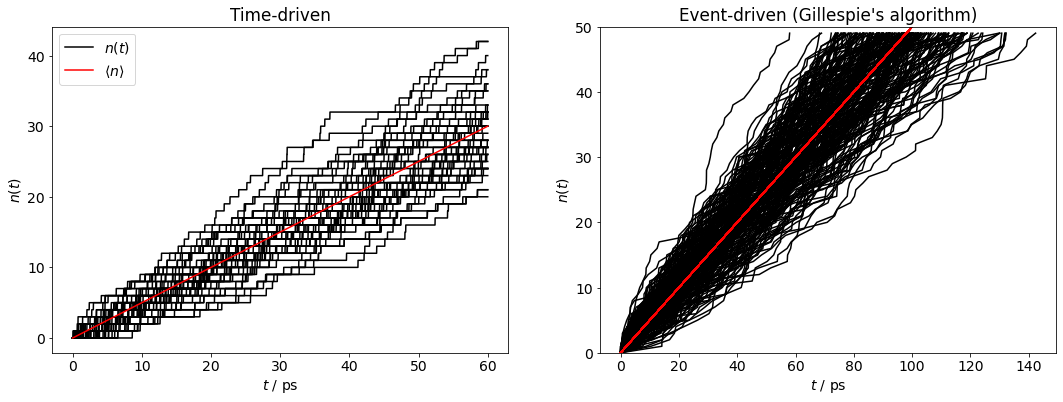

In [19]:
font = {'size'   : 14}
plt.rc('font', **font)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18, 6))
ax0.plot(tvalues, N[:,0],'k', label=r"$n(t)$");
ax0.plot(tvalues, N[:,0:-1:100],'k');
ax0.plot(tvalues, tvalues*mu,'r', label=r"$\langle n \rangle$");
ax0.legend()
ax0.set_xlabel(r'$t$ / ps')
ax0.set_ylabel(r'$n(t)$')
ax0.set_title('Time-driven')
ax1.plot(real_time[:,0:-1:100], Ng[:,0:-1:100],'k');
ax1.plot(real_time[:,0:-1:100], real_time[:,0:-1:100] * mu,'r');
ax1.set_ylim((0,50))
ax1.set_xlabel(r'$t$ / ps')
ax1.set_ylabel(r'$n(t)$')
ax1.set_title("Event-driven (Gillespie's algorithm)")